<a href="https://colab.research.google.com/github/bhattronak1/ML-Tensorflow-project/blob/main/Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
assert sklearn.__version__>='0.20'
import numpy as np
import pandas as pd
import requests
import io
import os
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_selector as selector
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

#To plot figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#ignore warning
import warnings
warnings.filterwarnings(action='ignore', message='^internal gelsd')

## **GET THE DATA**

In [ ]:
def load_data_url(url):
  return pd.read_csv(url)

In [ ]:
Titanic_data = load_data_url('https://raw.githubusercontent.com/bhattronak1/ML-Tensorflow-project/main/Titanic_Train.csv')
Titanic_test = load_data_url('https://raw.githubusercontent.com/bhattronak1/ML-Tensorflow-project/main/Titanic_Test.csv')

In [ ]:
Titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
Titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## **Prepare Data for Machine Learning**

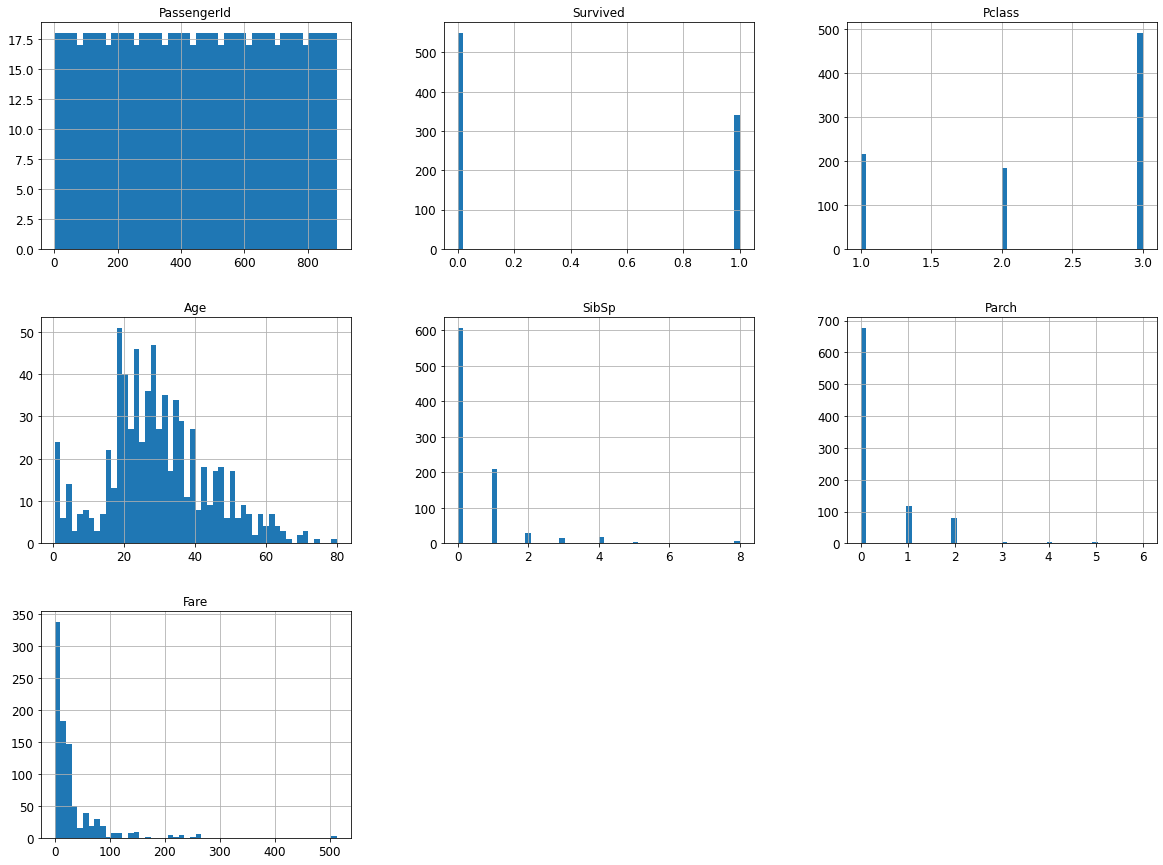

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
Titanic_data.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
Titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
Titanic_test_data=Titanic_test.drop(['Name','Ticket','Cabin'], axis=1)

In [ ]:
Titanic_test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [ ]:
Titanic = Titanic_data.drop(['Survived','Name','Ticket','Cabin'], axis =1)
Titanic_labels = Titanic_data['Survived'].copy()
Titanic.isna().sum()

PassengerId      0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [ ]:
print('Lable shape is:', Titanic_labels.shape)

Lable shape is: (891,)


In [ ]:
Titanic_num =  Titanic.drop(['Sex', 'Embarked'], axis=1)
Titanic_cat = Titanic[['Sex','Embarked']]
Titanic_cat.shape

(891, 2)

# **Create Pipeline**

In [ ]:
num_pipeline = Pipeline([
            ( 'impute', SimpleImputer(missing_values=np.nan, strategy='median')),
            ('std_scaler', StandardScaler()),
])

In [ ]:
cat_pipeline = Pipeline([
               ( 'impute', SimpleImputer(missing_values=np.nan, strategy='constant')),        
            ('encoder', OneHotEncoder(handle_unknown='ignore')),
])

# **Create a Model**

In [ ]:
lin_reg = LinearRegression()

In [ ]:
log_reg = LogisticRegression()

In [ ]:
sgd_clf = SGDClassifier(max_iter= 1000, tol=1e-3, random_state=42)

In [ ]:
from sklearn.svm import SVC

svc_clf=SVC(gamma='auto')

# **Create ColumTransformer**

In [ ]:
num_attribs = list(Titanic_num)
cat_attribs = list(Titanic_cat)

col_transform = ColumnTransformer([
                     ('num', num_pipeline, num_attribs),
                     ('cat', cat_pipeline, cat_attribs),
])

# **Create pipeline**

## **Linear** **Regression**

In [ ]:
Titanic.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S


In [ ]:
estimator = [('col_tran', col_transform), ('linear', lin_reg)]
pipe=Pipeline(estimator)

In [ ]:
pipe.fit(Titanic, Titanic_labels)
Titanic_predict=pipe.predict(Titanic)
lin_mse = mean_squared_error(Titanic_labels, Titanic_predict)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.3773312120814595

# **Logistic Regression**

In [ ]:
estimator = [('col_tran', col_transform), ('logistic', log_reg)]
pipe=Pipeline(estimator)


In [ ]:
pipe.fit(Titanic, Titanic_labels)
Titanic_predict=pipe.predict(Titanic)
lon_mse = mean_squared_error(Titanic_labels, Titanic_predict)
lon_rmse = np.sqrt(lon_mse)
lon_rmse

0.4469625634310624

# **SGD Classifier**

In [ ]:
estimator = [('col_tran', col_transform), ('sgd', sgd_clf)]
pipe=Pipeline(estimator)

In [ ]:
pipe.fit(Titanic, Titanic_labels)
Titanic_predict = pipe.predict(Titanic)
sgd_mse = mean_squared_error(Titanic_labels, Titanic_predict)
sgd_rmse = np.sqrt(sgd_mse)
sgd_rmse

0.4702125984770659

In [ ]:
estimator = [('col_tran', col_transform)]
pipe=Pipeline(estimator)

In [ ]:
X_= pipe.fit_transform(Titanic)

In [ ]:
svc_clf.fit(X_, Titanic_labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
X_1 = svc_clf.predict(X_)

In [ ]:
from sklearn.model_selection import cross_val_score
svm_score = cross_val_score(svc_clf, X_, Titanic_labels, cv=10)
svm_score.mean()

0.8249313358302123